<a href="https://colab.research.google.com/github/allnes/age_classifier/blob/master/train_age_pip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect to Google Drive

In [9]:
from google.colab import drive
import os, natsort as nsrt, numpy as np, re
from scipy.sparse import coo_matrix, csgraph
import matplotlib.pyplot as plt
!pip install ChebyGCN

drive.mount('/content/drive')
PATH_PROJECT='/content/drive/My Drive/DL_DATA_GRAPH/'
PATH_CNN_REPO=PATH_PROJECT + 'BUILD/cnn_graph/'
os.chdir(PATH_CNN_REPO)
from lib import models, graph, coarsening, utils
%ls

# !git clone https://github.com/mdeff/cnn_graph
!git pull origin master

os.chdir(PATH_PROJECT)
%ls
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
lib/         makefile   rcv1.ipynb  requirements.txt  usage.ipynb
LICENSE.txt  nips2016/  README.md   trials/
From https://github.com/mdeff/cnn_graph
 * branch            master     -> FETCH_HEAD
Already up to date.
BUILD/  DATA/


## Preprocessing data

['M', 'D', 'E', 'num_samples', 'num_features']
(0,)
(729,)


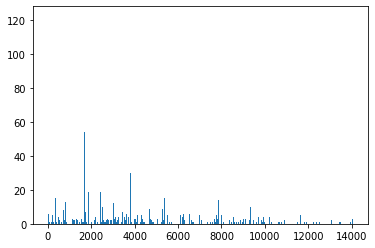

In [12]:
PATH_GRAPHS=PATH_PROJECT + 'DATA/mini_graphs/graphs/'
list_grpahs = []
for (_, _, filenames) in os.walk(PATH_GRAPHS):
    list_grpahs = list_grpahs + filenames

list_grpahs = nsrt.natsorted(list_grpahs)[0::2]

num_samples = int(np.load(PATH_GRAPHS + list_grpahs[0])['num_samples'])
num_features = int(np.load(PATH_GRAPHS + list_grpahs[0])['num_features'])

X = []
for graph_name in [list_grpahs[0]]:
# for graph_name in list_grpahs:
    with np.load(PATH_GRAPHS + graph_name) as raw_graph:
        raw_edges = raw_graph['E'].transpose()
        rows = raw_edges[0]
        cols = raw_edges[1]
        raw_data = raw_graph['D']
        plt.hist(rows, bins=1000)
        # raw_graph = np.zeros((num_features, num_features))
        # index = 0
        # for x_ind, y_ind in zip(rows, cols):
        #     raw_graph[x_ind][y_ind] = raw_data[index]
        #     index +=1
        sparse_graph = coo_matrix((raw_data, (rows, cols)),
                                  shape=(raw_graph['num_features'],
                                        raw_graph['num_features'])).todense()
        # X.append(np.resize(raw_graph.copy(), (2, 2)).reshape((4, )))
PATH_LABELS=PATH_PROJECT + 'DATA/mini_graphs/GSE87571_samples.txt'

raw_file = open(PATH_LABELS, 'r')
y = []
for line in raw_file.readlines():
    match_obj = re.match(r'(GSM[0-9]*)\s*([M,F])\s*([0-9]*)\s*([0-9]*)', line)
    if not match_obj is None: 
        y.append(int(match_obj.group(3)))

# assert len(y) == num_samples
# assert len(X) == num_samples
X = np.array(X)
y = np.array(y)
print(raw_graph.files)
print(X.shape)
print(y.shape)

## Train

In [0]:
# from ChebyGCN import layers, coarsening

# n_train = (num_samples * 3) // 4
# n_val = num_samples // 10

# X_train = X[:n_train]
# X_val   = X[n_train:n_train+n_val]
# X_test  = X[n_train+n_val:]

# y_train = y[:n_train] // 10
# y_val   = y[n_train:n_train+n_val] // 10
# y_test  = y[n_train+n_val:] // 10

# print(X[0].todense())
# dist, idx = graph.distance_sklearn_metrics(X[0], k=2, metric='euclidean')
# A = graph.adjacency(dist, idx).astype(np.float32)

# # graphs, perm = coarsening.coarsen(A, levels=3, self_connections=True)
# # X_train = coarsening.perm_data(X_train, perm)
# # X_test = coarsening.perm_data(X_test, perm)
# print(X_train.shape)
# L = [coarsening.laplacian(A, normalized=True) for A in X_train]
# print(len(L))
# # x_input = Input(shape=(X_train.shape[0],))
# # x = Reshape((X_train.shape[0],1))(x_input)
# # x = layers.GraphConvolution( 8, 2, 20, L[0])(x)
# # x = layers.GraphConvolution( 8, 4, 10, L[2])(x)
# # x = Flatten()(x)
# # x = Dense(66, activation='softmax')(x)